In [1]:
import pandas as pd
import numpy as np

from pandas import read_excel

import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

from sklearn.model_selection import TimeSeriesSplit 

from matplotlib.patches import Patch
import matplotlib.pyplot as plt 

pd.set_option('Display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
from sklearn import preprocessing

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt

### ★ Loading Dataframe

In [3]:
df_raw = read_excel("./data.xlsx", index_col = 0)

# scaler = preprocessing.MinMaxScaler()
# prep = scaler.fit_transform(df_raw)
# df_final = pd.DataFrame(prep, columns = df_raw.columns)

In [4]:
df_raw.shape

(2197, 46)

In [5]:
df_raw.head(3)

,VIX_Y,VIX_D_X,VIX_W_X,VIX_M_X,dis,Score,google_1,google_2,google_3,google_4,google_5,google_6,^GSPC,CL=F,^DJI,MSCI,oil,DXY,credit,term,FF,Mkt-RF,SMB,HML,RF,ST_Rev,tbill,eur,cny,gbp,jpy,GSPC_TR,DJI_TR,MSCI_TR,GSPC_TR_Change,DJI_TR_Change,MSCI_TR_Change,inf_M,SentMichigan,m1,house,indus,orders,crb,capa_level,capa_change
2010-02-05,3.26232,3.26117,3.14441,3.03808,0.57929,0.07314,6,36,9,7,45,8,0.00042,-0.00630,0.00011,0.00203,71.15000,94.62180,6.81000,3.49000,0.13429,0.29000,-0.06000,0.01000,0.00000,0.68000,0.28000,-0.03458,-0.00004,-0.02017,0.00035,5.82318,2.78837,0.64618,0.05468,0.01025,0.32014,-0.00077,-0.00927,0.01376,-0.00670,0.00404,-0.00135,-0.01942,71.09571,0.00606
2010-02-12,3.12369,3.17639,3.24181,3.11005,0.43976,0.23938,4,47,6,6,0,8,-0.00039,-0.00356,-0.00048,-0.00031,74.11000,93.99760,7.03000,3.59000,0.14179,-0.07000,0.97000,0.15000,0.00000,0.07000,0.34000,-0.00354,-0.00002,-0.00071,0.00045,3.71437,2.64704,0.71026,-0.04056,0.76670,-0.14991,-0.00045,-0.00656,0.01182,0.01031,0.00492,0.00178,-0.00667,71.25954,0.00697
2010-02-16,3.10234,3.12369,3.21409,3.12003,0.43817,0.19614,4,30,4,5,15,7,0.00256,0.00885,0.00181,0.00425,76.98000,93.48200,7.02000,3.56000,0.14607,1.75000,-0.14000,1.01000,0.00000,0.76000,0.33000,0.02764,0.00000,0.00893,0.00113,3.57914,2.06025,0.21979,-0.02826,-0.25745,3.42835,-0.00026,-0.00502,0.01071,0.02003,0.00543,0.00356,0.02557,71.35315,0.00749


In [6]:
# pd.DataFrame(scaler.inverse_transform(df_final), columns = df_raw.columns).head(3)

### ☆ Cross-Validation Example and Visualization

In [9]:
kfcv = KFold(n_splits=5, shuffle=False)
kfcv

KFold(n_splits=5, random_state=None, shuffle=False)

In [10]:
tscv = TimeSeriesSplit(n_splits = 5)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [11]:
X_example = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y_example = np.array([1, 2, 3, 4, 5, 6])

In [12]:
for train_index, test_index in kfcv.split(X_example):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_example[train_index], X_example[test_index]
    y_train, y_test = y_example[train_index], y_example[test_index]

TRAIN: [2 3 4 5] TEST: [0 1]
TRAIN: [0 1 3 4 5] TEST: [2]
TRAIN: [0 1 2 4 5] TEST: [3]
TRAIN: [0 1 2 3 5] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [13]:
for train_index, test_index in tscv.split(X_example):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_example[train_index], X_example[test_index]
    y_train, y_test = y_example[train_index], y_example[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [15]:
# df_final.head(3)

### ★ Train & Test Split

In [16]:
""" Scaling MIN MAX Scaler """

X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

y = pd.DataFrame(df_raw.loc[:, 'VIX_Y'])
X = df_raw.loc[:, df_raw.columns != 'VIX_Y']

prep_y = y_scaler.fit_transform(y)
prep_X = X_scaler.fit_transform(X)

y = pd.DataFrame(prep_y, columns = [df_raw.columns[0]])
X = pd.DataFrame(prep_X, columns = df_raw.columns[1:])
# X = df_final.loc[:,~(df_final.columns.isin(['VIX_Y','VIX_D_X','VIX_W_X','VIX_M_X']))]


In [17]:
X_all = X.loc[:, X.columns != 'VIX_Y']
X_eco = X.loc[:, ~(X.columns.isin(['VIX_Y','Score','dis','google_1','google_2','google_3','google_4','google_5','google_6']))]
X_har = X.loc[:, X.columns.isin(['VIX_D_X','VIX_W_X','VIX_M_X'])]

In [18]:
""" Train Test Split for Time Series """

train_ind = int(len(y)*0.9)

X_all_train = X_all[:train_ind]
X_eco_train = X_eco[:train_ind]
X_har_train = X_har[:train_ind]
y_train = y[:train_ind]

X_all_test = X_all[train_ind:]
X_eco_test = X_eco[train_ind:]
X_har_test = X_har[train_ind:]
y_test = y[train_ind:]

In [19]:
X_eco_train.head(2)

,VIX_D_X,VIX_W_X,VIX_M_X,^GSPC,CL=F,^DJI,MSCI,oil,DXY,credit,term,FF,Mkt-RF,SMB,HML,RF,ST_Rev,tbill,eur,cny,gbp,jpy,GSPC_TR,DJI_TR,MSCI_TR,GSPC_TR_Change,DJI_TR_Change,MSCI_TR_Change,inf_M,SentMichigan,m1,house,indus,orders,crb,capa_level,capa_change
0,0.63219,0.60666,0.56425,0.62128,0.30993,0.56626,0.70515,0.51560,0.27111,0.61448,0.90313,0.02922,0.60349,0.34342,0.43953,0.00000,0.62891,0.08140,0.39773,0.39483,0.65400,0.52773,0.62721,0.67646,0.06062,0.69903,0.23323,0.45851,0.45668,0.53945,0.38288,0.46303,0.59139,0.51254,0.31262,0.00000,0.61748
1,0.58107,0.67184,0.61805,0.57174,0.35497,0.51236,0.68711,0.54954,0.25262,0.65152,0.93162,0.03263,0.57357,0.52669,0.47209,0.00000,0.53800,0.10465,0.42971,0.39622,0.72161,0.53415,0.37817,0.64138,0.06698,0.69832,0.23523,0.45582,0.48325,0.55076,0.35579,0.50427,0.63068,0.51904,0.44747,0.01778,0.65468


In [20]:
y_train.shape, y_test.shape

((1977, 1), (220, 1))

### CV using Pipeline

In [21]:
""" LASSO """
pipeline = Pipeline([('model', Lasso())])

# """ LASSO """
# pipeline = Pipeline([('scaler', StandardScaler()),('model', Lasso())])

#### ★ K-Fold CV

In [22]:
kfcv = KFold(n_splits=5, shuffle=False)
kfcv

KFold(n_splits=5, random_state=None, shuffle=False)

In [23]:
search_kfcv = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.001,2,0.1)},
                      cv = kfcv, scoring="neg_mean_squared_error",verbose=0
                      )

search_kfcv.fit(X_all_train, y_train)
search_kfcv.best_params_

# search_kfcv.best_score_

{'model__alpha': 0.001}

<Figure size 720x720 with 0 Axes>

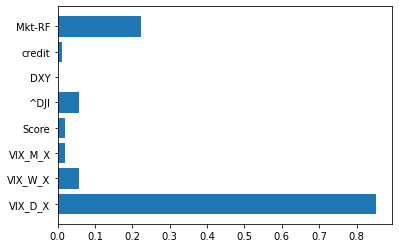

<Figure size 720x720 with 0 Axes>

In [24]:
coefficients = search_kfcv.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

plt.barh(X_all_train.columns[importance > 0], importance[importance>0], align='center')
plt.figure(figsize=(10,10))

#### ★ Time Series CV

In [25]:
search_tscv = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.001,2,0.1)},
                      cv = tscv, scoring="neg_mean_squared_error",verbose=0
                      )

search_tscv.fit(X_all_train, y_train)
search_tscv.best_params_

# search_tscv.best_score_

{'model__alpha': 0.001}

<Figure size 720x720 with 0 Axes>

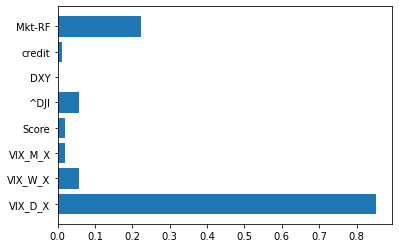

<Figure size 720x720 with 0 Axes>

In [26]:
coefficients = search_tscv.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

plt.barh(X_all_train.columns[importance > 0], importance[importance>0], align='center')
plt.figure(figsize=(10,10))

#### ★ Block Time Series CV

In [27]:
class BlockingTimeSeriesSplit():
    
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
    
        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.7 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

### ★ Lasso Regression

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np

In [29]:
ridge_alpha = 1
lasso_alpha = 0.001

linear_all = LinearRegression()
linear_eco = LinearRegression()
linear_har = LinearRegression()

ridge_all = Ridge(alpha = ridge_alpha)
ridge_eco = Ridge(alpha = ridge_alpha)
ridge_har = Ridge(alpha = ridge_alpha)

lasso_all = Lasso(alpha = lasso_alpha)
lasso_eco = Lasso(alpha = lasso_alpha)
lasso_har = Lasso(alpha = lasso_alpha)

In [30]:
linear_all.fit(X_all_train,y_train)
linear_eco.fit(X_eco_train,y_train)
linear_har.fit(X_har_train,y_train)

ridge_all.fit(X_all_train,y_train)
ridge_eco.fit(X_eco_train,y_train)
ridge_har.fit(X_har_train,y_train)

lasso_all.fit(X_all_train,y_train)
lasso_eco.fit(X_eco_train,y_train)
lasso_har.fit(X_har_train,y_train)

Lasso(alpha=0.001)

In [31]:
# Inverse transformation

linear_all_y_hat = y_scaler.inverse_transform(linear_all.predict(X_all_test).reshape(-1,1))
linear_eco_y_hat = y_scaler.inverse_transform(linear_eco.predict(X_eco_test).reshape(-1,1))
linear_har_y_hat = y_scaler.inverse_transform(linear_har.predict(X_har_test).reshape(-1,1))

ridge_all_y_hat = y_scaler.inverse_transform(ridge_all.predict(X_all_test).reshape(-1,1))
ridge_eco_y_hat = y_scaler.inverse_transform(ridge_eco.predict(X_eco_test).reshape(-1,1))
ridge_har_y_hat = y_scaler.inverse_transform(ridge_har.predict(X_har_test).reshape(-1,1))

lasso_all_y_hat = y_scaler.inverse_transform(lasso_all.predict(X_all_test).reshape(-1,1))
lasso_eco_y_hat = y_scaler.inverse_transform(lasso_eco.predict(X_eco_test).reshape(-1,1))
lasso_har_y_hat = y_scaler.inverse_transform(lasso_har.predict(X_har_test).reshape(-1,1))

y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1,1)) 

linear_all_r2, ridge_all_r2, lasso_all_r2 = r2_score(y_test_original,linear_all_y_hat), r2_score(y_test_original,ridge_all_y_hat), r2_score(y_test_original,lasso_all_y_hat)
linear_eco_r2, ridge_eco_r2, lasso_eco_r2 = r2_score(y_test_original,linear_eco_y_hat), r2_score(y_test_original,ridge_eco_y_hat), r2_score(y_test_original,lasso_eco_y_hat)
linear_har_r2, ridge_har_r2, lasso_har_r2 = r2_score(y_test_original,linear_har_y_hat), r2_score(y_test_original,ridge_har_y_hat), r2_score(y_test_original,lasso_har_y_hat)

linear_all_MSE, ridge_all_MSE, lasso_all_MSE = mean_squared_error(y_test_original,linear_all_y_hat), mean_squared_error(y_test_original,ridge_all_y_hat), mean_squared_error(y_test_original,lasso_all_y_hat)
linear_eco_MSE, ridge_eco_MSE, lasso_eco_MSE = mean_squared_error(y_test_original,linear_eco_y_hat), mean_squared_error(y_test_original,ridge_eco_y_hat), mean_squared_error(y_test_original,lasso_eco_y_hat)
linear_har_MSE, ridge_har_MSE, lasso_har_MSE = mean_squared_error(y_test_original,linear_har_y_hat), mean_squared_error(y_test_original,ridge_har_y_hat), mean_squared_error(y_test_original,lasso_har_y_hat)

linear_all_MAE, ridge_all_MAE, lasso_all_MAE = mean_absolute_error(y_test_original,linear_all_y_hat), mean_absolute_error(y_test_original,ridge_all_y_hat), mean_absolute_error(y_test_original,lasso_all_y_hat)
linear_eco_MAE, ridge_eco_MAE, lasso_eco_MAE = mean_absolute_error(y_test_original,linear_eco_y_hat), mean_absolute_error(y_test_original,ridge_eco_y_hat), mean_absolute_error(y_test_original,lasso_eco_y_hat)
linear_har_MAE, ridge_har_MAE, lasso_har_MAE = mean_absolute_error(y_test_original,linear_har_y_hat), mean_absolute_error(y_test_original,ridge_har_y_hat), mean_absolute_error(y_test_original,lasso_har_y_hat)

print('ALL R2 score - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_all_r2, ridge_all_r2, lasso_all_r2))
print('ECO R2 score - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_eco_r2, ridge_eco_r2, lasso_eco_r2))
print('HAR R2 score - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_har_r2, ridge_har_r2, lasso_har_r2))
print('---------------------------------------------------')
print('ALL MSE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_all_MSE, ridge_all_MSE, lasso_all_MSE))
print('ECO MSE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_eco_MSE, ridge_eco_MSE, lasso_eco_MSE))
print('HAR MSE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_har_MSE, ridge_har_MSE, lasso_har_MSE))
print('---------------------------------------------------')
print('ALL MAE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_all_MAE, ridge_all_MAE, lasso_all_MAE))
print('ECO MAE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_eco_MAE, ridge_eco_MAE, lasso_eco_MAE))
print('HAR MAE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_har_MAE, ridge_har_MAE, lasso_har_MAE))

ALL R2 score - Linear: 0.9521, Ridge: 0.9629, Lasso: 0.9588
ECO R2 score - Linear: 0.9605, Ridge: 0.9636, Lasso: 0.9581
HAR R2 score - Linear: 0.8940, Ridge: 0.8916, Lasso: 0.8946
---------------------------------------------------
ALL MSE - Linear: 0.0032, Ridge: 0.0025, Lasso: 0.0028
ECO MSE - Linear: 0.0027, Ridge: 0.0024, Lasso: 0.0028
HAR MSE - Linear: 0.0071, Ridge: 0.0073, Lasso: 0.0071
---------------------------------------------------
ALL MAE - Linear: 0.0388, Ridge: 0.0355, Lasso: 0.0392
ECO MAE - Linear: 0.0386, Ridge: 0.0356, Lasso: 0.0394
HAR MAE - Linear: 0.0624, Ridge: 0.0632, Lasso: 0.0626


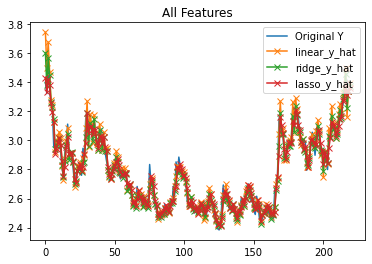

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_test)), y_test_original, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_all_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_all_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_all_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.title("All Features")
plt.show()

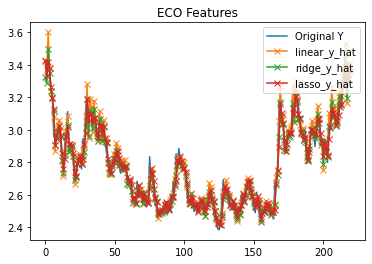

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_test)), y_test_original, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_eco_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_eco_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_eco_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.title("ECO Features")
plt.show()

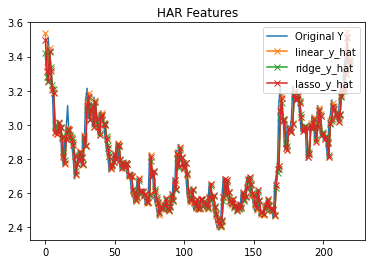

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_test)), y_test_original, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_har_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_har_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_har_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.title("HAR Features")
plt.show()

<AxesSubplot:>

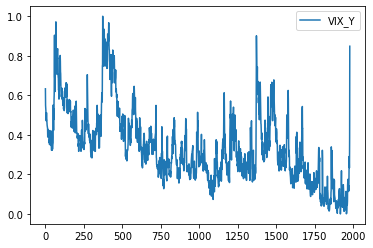

In [35]:
y_train.plot()

<AxesSubplot:>

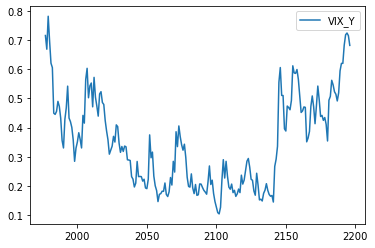

In [36]:
y_test.plot()

### ★ Random Forests - IID Bootstrap

In [37]:
from sklearn_timeseries import TimeSeriesRandomForestRegressor
from sklearn_timeseries import optimal_block_length
from pprint import pprint
import warnings

warnings.filterwarnings('ignore')

In [38]:
npdata = X.to_numpy()
npdata.shape

(2197, 45)

#### 1. Cross-validation : k-fold

In [39]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='iid',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = kfcv, n_jobs= -1)
grid_cv.fit(X_all_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 14, 'n_estimators': 150}
Best Score: 0.8883364500329016


In [40]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='iid', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_all_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_all_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('K-fold ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('K-fold ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('K-fold ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

K-fold ALL R2 score - RF_iid: 0.9616
K-fold ALL MSE score - RF_iid: 0.0026
K-fold ALL MAE score - RF_iid: 0.0383


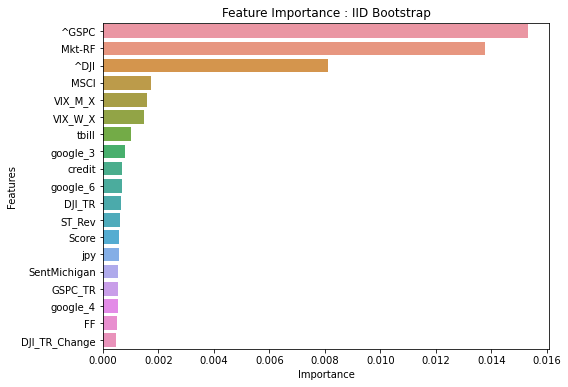

In [45]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_all_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : IID Bootstrap")
plt.show()

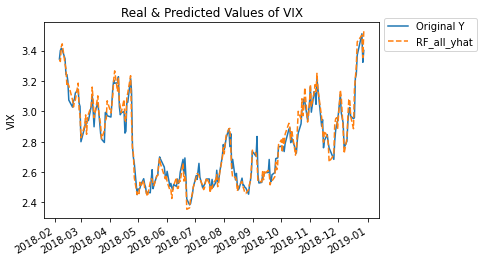

In [104]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:220], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:220], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

#### 2. Cross-validation : Time-series

In [105]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='iid',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = tscv, n_jobs= -1)
grid_cv.fit(X_all_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.7539191527179439


In [106]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='iid', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_all_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_all_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('Time-Series CV ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

Time-Series CV ALL R2 score - RF_iid: 0.9629
Time-Series CV ALL MSE score - RF_iid: 0.0025
Time-Series CV ALL MAE score - RF_iid: 0.0376


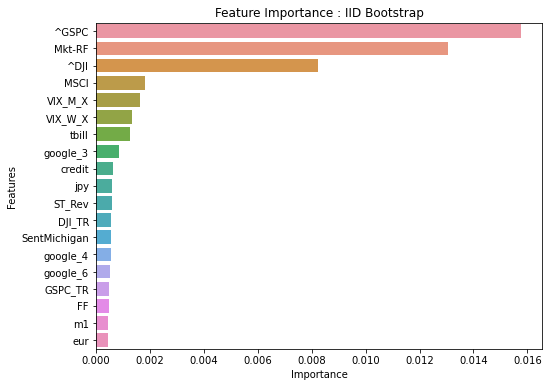

In [107]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_all_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : IID Bootstrap")
plt.show()

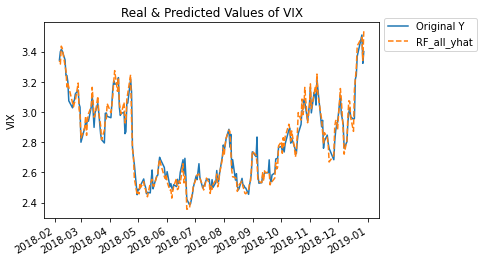

In [108]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:220], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:220], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

### ★ Random Forests - Stationary Bootstrap

#### 1. Cross-Validation : k-fold

In [109]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='sb',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = kfcv, n_jobs= -1)
grid_cv.fit(X_all_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 14, 'n_estimators': 150}
Best Score: 0.8826044704925924


In [110]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='sb', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_all_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_all_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('K-fold ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('K-fold ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('K-fold ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

K-fold ALL R2 score - RF_iid: 0.9627
K-fold ALL MSE score - RF_iid: 0.0025
K-fold ALL MAE score - RF_iid: 0.0380


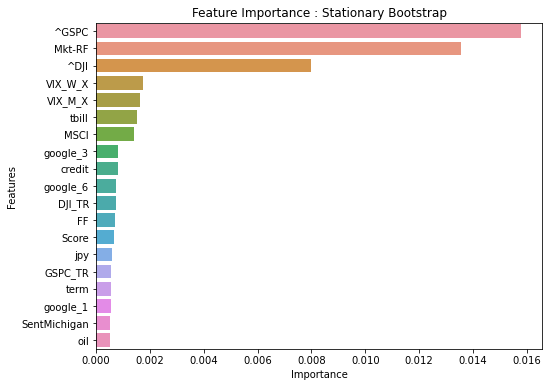

In [111]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_all_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : Stationary Bootstrap")
plt.show()

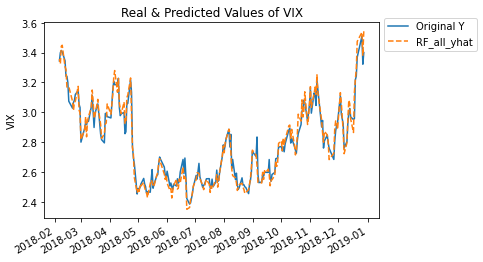

In [112]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:220], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:220], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

#### 2. Cross-Validation : Time-series

In [113]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='sb',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = tscv, n_jobs= -1)
grid_cv.fit(X_all_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.7153506415037982


In [114]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='sb', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_all_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_all_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('Time-Series CV ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

Time-Series CV ALL R2 score - RF_iid: 0.9626
Time-Series CV ALL MSE score - RF_iid: 0.0025
Time-Series CV ALL MAE score - RF_iid: 0.0383


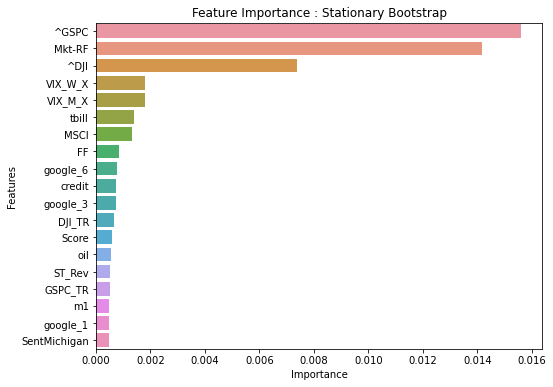

In [115]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_all_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : Stationary Bootstrap")
plt.show()

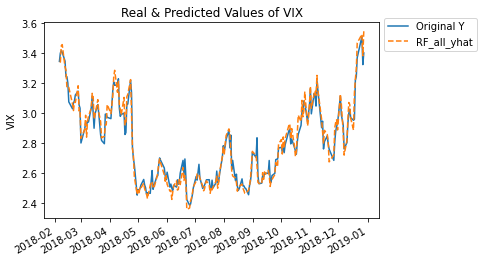

In [116]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:220], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:220], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

### ★ XGBOOST

In [894]:
from xgboost import XGBRegressor

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [896]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_all_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [897]:
xgb.feature_importances_

array([8.0029672e-01, 2.5775272e-02, 3.8635007e-03, 5.7302322e-04,
       1.5667847e-03, 4.1372638e-02, 6.6530466e-04, 1.1472895e-02,
       1.4133968e-03, 2.1107299e-03, 1.8012652e-03, 4.7698799e-03,
       1.5401233e-03, 2.8802888e-03, 4.5361172e-02, 8.2988665e-04,
       7.2717801e-04, 6.5823311e-05, 8.4916141e-04, 3.1224003e-02,
       1.8306195e-03, 7.2295667e-04, 8.7836612e-04, 9.7412354e-04,
       1.6741719e-03, 9.1328385e-04, 9.2531386e-04, 1.0450524e-03,
       8.7620469e-04, 9.3854993e-04, 9.0412423e-04, 1.8943927e-03,
       1.1052768e-03, 7.3967350e-04, 1.1149974e-03, 8.6009997e-04,
       9.8628772e-04, 1.1950835e-03, 1.2624401e-03], dtype=float32)

In [900]:
yhat_xgb = xgb.predict(X_all_test)
mean_squared_error(y_test, yhat_xgb)

0.001164556499391033

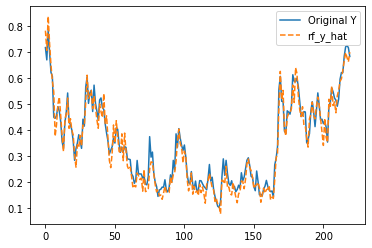

In [902]:
fig = plt.figure()
plt.plot(range(len(y_test)), y_test, '-', label="Original Y")
plt.plot(range(len(y_test)), yhat_xgb, '--', label="rf_y_hat")
plt.legend(loc='upper right')
plt.show()

Text(0.5, 0, 'Xgboost Feature Importance')

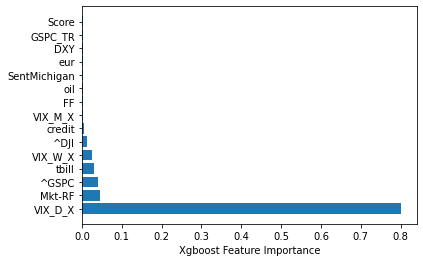

In [904]:
sorted_idx = xgb.feature_importances_.argsort()[::-1][0:15]
plt.barh(X_all_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Text(0.5, 0, 'Permutation Importance')

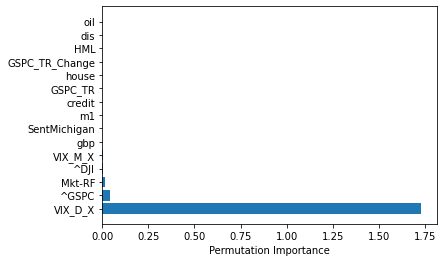

In [906]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb, X_all_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()[::-1][0:15]
plt.barh(X_all_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# ??

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

LR: 0.184474 (0.072299)
LA: 0.137695 (0.026062)
KNN: 0.268888 (0.073989)
RF: 0.240864 (0.077136)


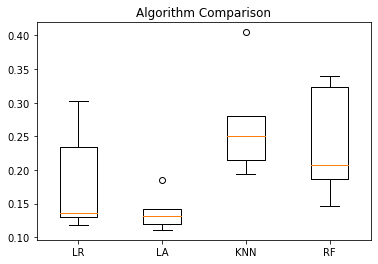

In [189]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LA', Lasso(alpha=0.005)))
# models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 30))) 
# Ensemble method - collection of many decision trees
# models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

LR: -0.281171 (0.992345)
LA: -0.955788 (1.066182)
KNN: -2.801550 (3.064035)
RF: -0.381865 (0.587553)


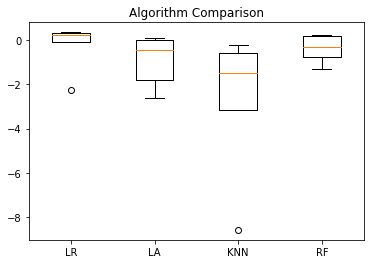

In [186]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LA', Lasso(alpha=0.05)))
# models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) 
# Ensemble method - collection of many decision trees
# models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

LR: -0.374654 (0.474827)
LA: -0.062644 (0.056954)
KNN: -0.066242 (0.053783)
RF: -0.031846 (0.017859)


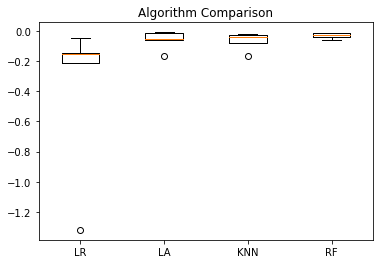

In [184]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LA', Lasso(alpha=0.005)))
# models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) 
# Ensemble method - collection of many decision trees
# models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=btscv, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()